## Public Satellite Orbit Tracking

These are not precise orbits, but can be helpful for understanding current and historical approximate satellite positions. Read more at https://www.space-track.org

You'll need a free API account to run this notebook
https://www.space-track.org/auth/login
You can store your password in a `~/.netrc` file like this:
```
machine space-track.org login YOUR_LOGIN password YOUR_PASSWORD
```

This example notebook makes some orbital plots using [Capella Space](https://www.capellaspace.com) SAR satellites. You can also browse auto-generated plots via the excellent Celestrak website https://celestrak.org

In [1]:
import pandas as pd
import requests
import netrc
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

## Authentication

In [3]:
!chmod 600 ~/.netrc
parse = netrc.netrc()
login, account, password = parse.authenticators("space-track.org")

In [4]:
session = requests.Session()
response = session.post('https://www.space-track.org/ajaxauth/login', data={'identity': login, 'password': password})

## Single Satellite Current Metadata

In [5]:
# Information on a given satellite (KNOWN NORAD ID)
API = 'https://www.space-track.org/basicspacedata/query'
norad_id = 51071

query = f'{API}/class/satcat/NORAD_CAT_ID/{norad_id}'
session.get(query).json()

[{'INTLDES': '2022-002CR',
  'NORAD_CAT_ID': '51071',
  'OBJECT_TYPE': 'PAYLOAD',
  'SATNAME': 'CAPELLA-8 (WHITNEY)',
  'COUNTRY': 'US',
  'LAUNCH': '2022-01-13',
  'SITE': 'AFETR',
  'DECAY': None,
  'PERIOD': '93.59',
  'INCLINATION': '97.44',
  'APOGEE': '452',
  'PERIGEE': '449',
  'COMMENT': None,
  'COMMENTCODE': None,
  'RCSVALUE': '0',
  'RCS_SIZE': 'LARGE',
  'FILE': '8411',
  'LAUNCH_YEAR': '2022',
  'LAUNCH_NUM': '2',
  'LAUNCH_PIECE': 'CR',
  'CURRENT': 'Y',
  'OBJECT_NAME': 'CAPELLA-8 (WHITNEY)',
  'OBJECT_ID': '2022-002CR',
  'OBJECT_NUMBER': '51071'}]

In [20]:
# When was satellite added to catalog? (DEBUT)
# Information on a given satellite
API = 'https://www.space-track.org/basicspacedata/query'

query = f'{API}/class/satcat_debut/NORAD_CAT_ID/{norad_id}'
session.get(query).json()

[{'INTLDES': '2022-002CR',
  'NORAD_CAT_ID': '51071',
  'OBJECT_TYPE': 'PAYLOAD',
  'SATNAME': 'CAPELLA-8 (WHITNEY)',
  'DEBUT': '2022-01-20 20:13:09',
  'COUNTRY': 'US',
  'LAUNCH': '2022-01-13',
  'SITE': 'AFETR',
  'DECAY': None,
  'PERIOD': None,
  'INCLINATION': None,
  'APOGEE': None,
  'PERIGEE': None,
  'COMMENT': None,
  'COMMENTCODE': None,
  'RCSVALUE': '0',
  'RCS_SIZE': 'LARGE',
  'FILE': '8411',
  'LAUNCH_YEAR': '2022',
  'LAUNCH_NUM': '2',
  'LAUNCH_PIECE': 'CR',
  'CURRENT': 'Y',
  'OBJECT_NAME': 'CAPELLA-8 (WHITNEY)',
  'OBJECT_ID': '2022-002CR',
  'OBJECT_NUMBER': '51071'}]

### Historical TLE Orbital Information

In [6]:
start = '2020-01-01'
end = '2023-03-17'

query = f'{API}/class/gp_history/NORAD_CAT_ID/{norad_id}/orderby/TLE_LINE1%20ASC/EPOCH/{start}--{end}/format/json'
query

'https://www.space-track.org/basicspacedata/query/class/gp_history/NORAD_CAT_ID/51071/orderby/TLE_LINE1%20ASC/EPOCH/2020-01-01--2023-03-17/format/json'

In [7]:
resp = session.get(query)
data = resp.json()

In [8]:
data[0]

{'CCSDS_OMM_VERS': '2.0',
 'COMMENT': 'GENERATED VIA SPACE-TRACK.ORG API',
 'CREATION_DATE': '2022-01-19T20:26:11',
 'ORIGINATOR': '18 SPCS',
 'OBJECT_NAME': 'TBA - TO BE ASSIGNED',
 'OBJECT_ID': '2022-002CR',
 'CENTER_NAME': 'EARTH',
 'REF_FRAME': 'TEME',
 'TIME_SYSTEM': 'UTC',
 'MEAN_ELEMENT_THEORY': 'SGP4',
 'EPOCH': '2022-01-18T23:25:29.036928',
 'MEAN_MOTION': '15.12663489',
 'ECCENTRICITY': '0.00109200',
 'INCLINATION': '97.5069',
 'RA_OF_ASC_NODE': '88.5640',
 'ARG_OF_PERICENTER': '217.1056',
 'MEAN_ANOMALY': '142.9421',
 'EPHEMERIS_TYPE': '0',
 'CLASSIFICATION_TYPE': 'U',
 'NORAD_CAT_ID': '51071',
 'ELEMENT_SET_NO': '999',
 'REV_AT_EPOCH': '81',
 'BSTAR': '0.00016424000000',
 'MEAN_MOTION_DOT': '0.00002810',
 'MEAN_MOTION_DDOT': '0.0000000000000',
 'SEMIMAJOR_AXIS': '6906.218',
 'PERIOD': '95.196',
 'APOAPSIS': '535.625',
 'PERIAPSIS': '520.542',
 'OBJECT_TYPE': 'TBA',
 'RCS_SIZE': None,
 'COUNTRY_CODE': None,
 'LAUNCH_DATE': None,
 'SITE': None,
 'DECAY_DATE': None,
 'FILE': '

In [9]:
# NOTE many of these appear as duplicates, but have slightly different GP_ID
# Not sure why...
df = pd.DataFrame(data)
df.head(2).T

,0,1
CCSDS_OMM_VERS,2.0,2.0
COMMENT,GENERATED VIA SPACE-TRACK.ORG API,GENERATED VIA SPACE-TRACK.ORG API
CREATION_DATE,2022-01-19T20:26:11,2022-01-20T07:11:05
ORIGINATOR,18 SPCS,18 SPCS
OBJECT_NAME,TBA - TO BE ASSIGNED,TBA - TO BE ASSIGNED
OBJECT_ID,2022-002CR,2022-002CR
CENTER_NAME,EARTH,EARTH
REF_FRAME,TEME,TEME
TIME_SYSTEM,UTC,UTC
MEAN_ELEMENT_THEORY,SGP4,SGP4


In [10]:
print(f'Number of TLE Solutions from {start} to {end} for satellite {norad_id}:')
print(len(df))

Number of TLE Solutions from 2020-01-01 to 2023-03-17 for satellite 51071:
1052


In [11]:
keep_cols = ['CREATION_DATE','EPOCH','ECCENTRICITY','INCLINATION','SEMIMAJOR_AXIS']
df = df[keep_cols]
df['CREATION_DATE'] = pd.to_datetime(df.CREATION_DATE)
df['EPOCH'] = pd.to_datetime(df.EPOCH)
df = df.astype(np.float32, errors='ignore')
df.head(2)

,CREATION_DATE,EPOCH,ECCENTRICITY,INCLINATION,SEMIMAJOR_AXIS
0,2022-01-19 20:26:11,2022-01-18 23:25:29.036928,0.001092,97.506897,6906.217773
1,2022-01-20 07:11:05,2022-01-18 23:25:29.036928,0.001092,97.506897,6906.217773


In [12]:
df[:2].T

,0,1
CREATION_DATE,2022-01-19 20:26:11,2022-01-20 07:11:05
EPOCH,2022-01-18 23:25:29.036928,2022-01-18 23:25:29.036928
ECCENTRICITY,0.001092,0.001092
INCLINATION,97.506897,97.506897
SEMIMAJOR_AXIS,6906.217773,6906.217773


In [13]:
# Save for later
df.to_parquet(f'{norad_id}.parquet', version='2.6')

## Visualize orbit over time

In [14]:
# Subtract average earth radius
df.SEMIMAJOR_AXIS -= 6378.1366

In [15]:
df = df.drop_duplicates('EPOCH', ignore_index=True)

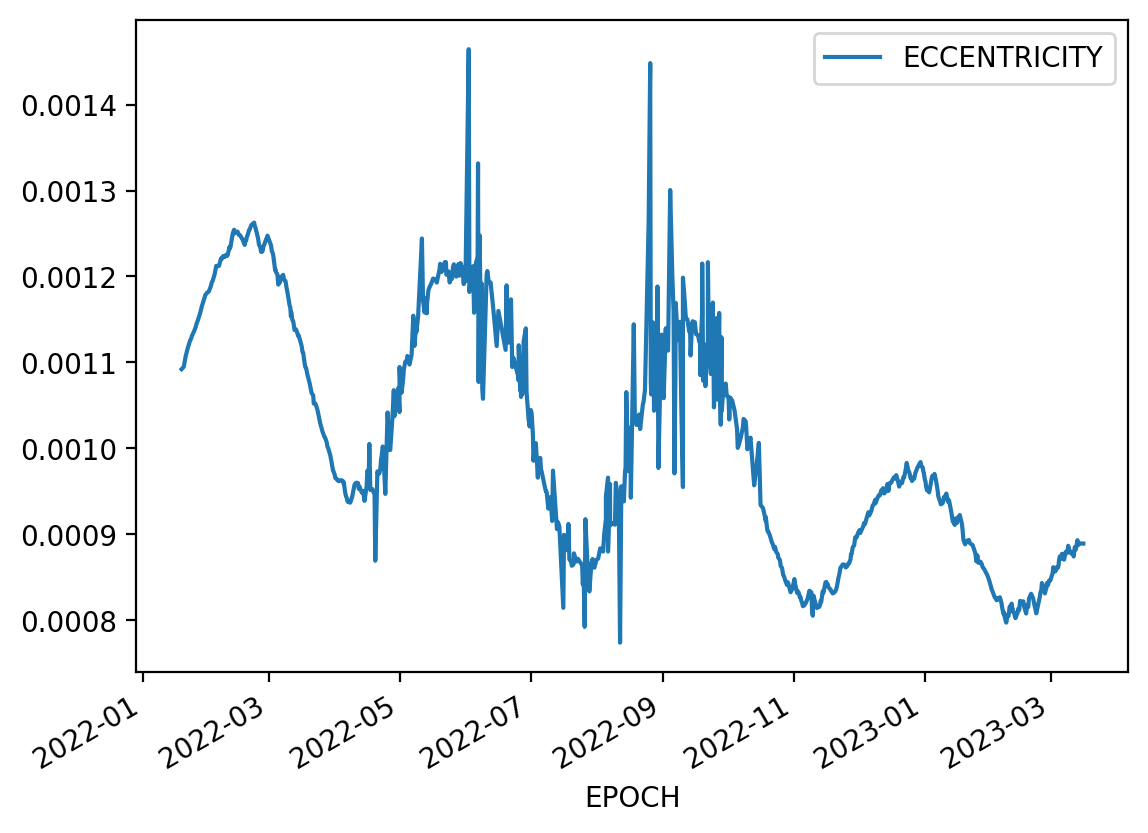

In [16]:
df.plot(x='EPOCH', y='ECCENTRICITY');

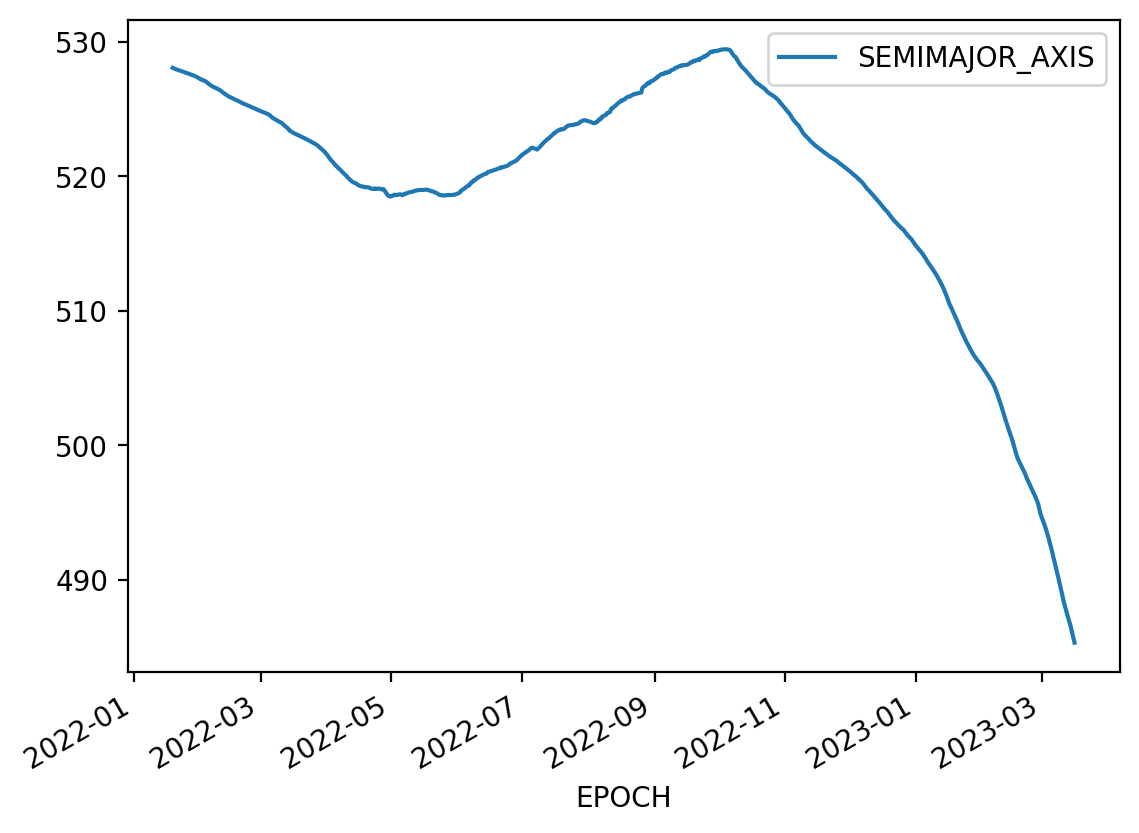

In [17]:
df.plot(x='EPOCH', y='SEMIMAJOR_AXIS');

### Find all satellites in a constellation by name

In [18]:
# Plot all Capella Altitude together on the same plot
# NOTE' I wonder why RCS_SIZE is LARGE (Same as Sentinel-1)...
API = 'https://www.space-track.org/basicspacedata/query'
name_contains = 'CAPELLA'

query = f'{API}/class/satcat/SATNAME/~~{name_contains}'
dfC = pd.DataFrame(session.get(query).json())
dfC = dfC.sort_values('LAUNCH', ignore_index=True)
dfC

,INTLDES,NORAD_CAT_ID,OBJECT_TYPE,SATNAME,COUNTRY,LAUNCH,SITE,DECAY,PERIOD,INCLINATION,...,RCSVALUE,RCS_SIZE,FILE,LAUNCH_YEAR,LAUNCH_NUM,LAUNCH_PIECE,CURRENT,OBJECT_NAME,OBJECT_ID,OBJECT_NUMBER
0,2018-099AK,43791,PAYLOAD,CAPELLA-1,US,2018-12-03,AFWTR,2023-01-25,88.11,97.57,...,0,LARGE,8322,2018,99,AK,Y,CAPELLA-1,2018-099AK,43791
1,2020-060B,46269,PAYLOAD,CAPELLA-2,US,2020-08-31,RLLC,2023-02-28,88.70,45.07,...,0,LARGE,8343,2020,60,B,Y,CAPELLA-2,2020-060B,46269
2,2021-006CE,47489,PAYLOAD,CAPELLA-3 (WHITNEY),US,2021-01-24,AFETR,2023-02-26,87.19,97.35,...,0,LARGE,8343,2021,6,CE,Y,CAPELLA-3 (WHITNEY),2021-006CE,47489
3,2021-006BW,47481,PAYLOAD,CAPELLA-4 (WHITNEY),US,2021-01-24,AFETR,2023-04-08,87.20,97.37,...,0,LARGE,8385,2021,6,BW,Y,CAPELLA-4 (WHITNEY),2021-006BW,47481
4,2021-041BE,48605,PAYLOAD,CAPELLA-6 (WHITNEY),US,2021-05-15,AFETR,None,95.38,53.03,...,0,LARGE,8411,2021,41,BE,Y,CAPELLA-6 (WHITNEY),2021-041BE,48605
5,2021-059AL,48913,PAYLOAD,CAPELLA-5 (WHITNEY),US,2021-06-30,AFETR,2023-02-23,87.52,97.52,...,0,LARGE,8336,2021,59,AL,Y,CAPELLA-5 (WHITNEY),2021-059AL,48913
6,2022-002CR,51071,PAYLOAD,CAPELLA-8 (WHITNEY),US,2022-01-13,AFETR,None,93.59,97.44,...,0,LARGE,8411,2022,2,CR,Y,CAPELLA-8 (WHITNEY),2022-002CR,51071
7,2022-002CS,51072,PAYLOAD,CAPELLA-7 (WHITNEY),US,2022-01-13,AFETR,None,93.57,97.44,...,0,LARGE,8411,2022,2,CS,Y,CAPELLA-7 (WHITNEY),2022-002CS,51072
8,2023-035C,55910,PAYLOAD,CAPELLA-9 (WHITNEY),US,2023-03-16,WLPIS,None,96.52,44.00,...,0,LARGE,8410,2023,35,C,Y,CAPELLA-9 (WHITNEY),2023-035C,55910
9,2023-035B,55909,PAYLOAD,CAPELLA-10 (WHITNEY),US,2023-03-16,WLPIS,None,96.50,44.00,...,0,LARGE,8411,2023,35,B,Y,CAPELLA-10 (WHITNEY),2023-035B,55909


In [19]:
dfC.to_csv('capella.csv')

In [21]:
# Crude approx for current elevation and inclination
dfC['ALTITUDE'] = (dfC.APOGEE.astype('f4') + dfC.PERIGEE.astype('f4'))/2

In [22]:
def get_debut(norad_id):
    query = f'{API}/class/satcat_debut/NORAD_CAT_ID/{norad_id}'
    result = session.get(query).json()[0]
    
    return result['DEBUT']

dfC['DEBUT'] = dfC.NORAD_CAT_ID.apply(get_debut)
dfC['DEBUT_DAYS'] = pd.to_datetime(dfC.DEBUT) - pd.to_datetime(dfC.LAUNCH) 

In [23]:
# NOTE: Does not record date of lost operations
def get_operational_status(norad_id):
    query = f'https://celestrak.org/satcat/records.php?CATNR={norad_id}'
    result = session.get(query).json()[0]
    return result['OPS_STATUS_CODE']

dfC['OPS_STATUS_CODE'] = dfC.NORAD_CAT_ID.apply(get_operational_status)

In [24]:
# Is satellite opertaional?
# https://space.stackexchange.com/questions/63068/establish-if-payload-is-still-operational-space-track
# https://celestrak.org/satcat/status.php
# *Active is any satellite with an operational status of +, P, B, S, or X.
query = f'https://celestrak.org/satcat/records.php?CATNR=39634'
print(session.get(query).json()[0])
query = f'https://celestrak.org/satcat/records.php?CATNR=41456'
print(session.get(query).json()[0])

{'OBJECT_NAME': 'SENTINEL-1A', 'OBJECT_ID': '2014-016A', 'NORAD_CAT_ID': 39634, 'OBJECT_TYPE': 'PAY', 'OPS_STATUS_CODE': '+', 'OWNER': 'ESA', 'LAUNCH_DATE': '2014-04-03', 'LAUNCH_SITE': 'FRGUI', 'DECAY_DATE': '', 'PERIOD': 98.68, 'INCLINATION': 98.18, 'APOGEE': 697, 'PERIGEE': 695, 'RCS': 4.9676, 'DATA_STATUS_CODE': '', 'ORBIT_CENTER': 'EA', 'ORBIT_TYPE': 'ORB'}
{'OBJECT_NAME': 'SENTINEL-1B', 'OBJECT_ID': '2016-025A', 'NORAD_CAT_ID': 41456, 'OBJECT_TYPE': 'PAY', 'OPS_STATUS_CODE': '-', 'OWNER': 'ESA', 'LAUNCH_DATE': '2016-04-25', 'LAUNCH_SITE': 'FRGUI', 'DECAY_DATE': '', 'PERIOD': 98.58, 'INCLINATION': 98.18, 'APOGEE': 692, 'PERIGEE': 690, 'RCS': 5.5865, 'DATA_STATUS_CODE': '', 'ORBIT_CENTER': 'EA', 'ORBIT_TYPE': 'ORB'}


In [25]:
dfC.loc[:,['SATNAME','LAUNCH','DEBUT', 'DEBUT_DAYS','OPS_STATUS_CODE']]
# NOTE: seems some latency or caching for new sats to actually show up (capella-9 &10, debut=1day, but actually showing up API response on 4/6)

,SATNAME,LAUNCH,DEBUT,DEBUT_DAYS,OPS_STATUS_CODE
0,CAPELLA-1,2018-12-03,2018-12-07 21:28:58,4 days 21:28:58,D
1,CAPELLA-2,2020-08-31,2020-08-31 17:08:36,0 days 17:08:36,D
2,CAPELLA-3 (WHITNEY),2021-01-24,2021-01-25 18:59:21,1 days 18:59:21,D
3,CAPELLA-4 (WHITNEY),2021-01-24,2021-01-25 18:59:21,1 days 18:59:21,D
4,CAPELLA-6 (WHITNEY),2021-05-15,2021-05-27 17:48:33,12 days 17:48:33,+
5,CAPELLA-5 (WHITNEY),2021-06-30,2021-07-08 19:46:54,8 days 19:46:54,D
6,CAPELLA-8 (WHITNEY),2022-01-13,2022-01-20 20:13:09,7 days 20:13:09,+
7,CAPELLA-7 (WHITNEY),2022-01-13,2022-01-20 20:13:09,7 days 20:13:09,+
8,CAPELLA-9 (WHITNEY),2023-03-16,2023-03-17 18:00:11,1 days 18:00:11,+
9,CAPELLA-10 (WHITNEY),2023-03-16,2023-03-17 18:00:11,1 days 18:00:11,+


In [26]:
# Some plots of orbits over time
def get_orbital_history(norad_id, save=False):
    '''returns a dataframe of all TLE solutions'''
    query = f'{API}/class/gp_history/NORAD_CAT_ID/{norad_id}/orderby/TLE_LINE1%20ASC/format/json'
    data = session.get(query).json()
    df = pd.DataFrame(data)
    
    keep_cols = ['CREATION_DATE','EPOCH','ECCENTRICITY','INCLINATION','SEMIMAJOR_AXIS']
    df = df[keep_cols]
    df['CREATION_DATE'] = pd.to_datetime(df.CREATION_DATE)
    df['EPOCH'] = pd.to_datetime(df.EPOCH)
    df = df.astype(np.float32, errors='ignore')

    # Subtract average earth radius
    df.SEMIMAJOR_AXIS -= 6378.1366
    
    if save:
        df.to_parquet(f'{norad_id}.parquet', version='2.6')
    
    return df

get_orbital_history(norad_id, save=True)

,CREATION_DATE,EPOCH,ECCENTRICITY,INCLINATION,SEMIMAJOR_AXIS
0,2022-01-19 20:26:11,2022-01-18 23:25:29.036928,0.001092,97.506897,528.081055
1,2022-01-20 07:11:05,2022-01-18 23:25:29.036928,0.001092,97.506897,528.081055
2,2022-01-20 20:13:46,2022-01-20 00:49:34.518720,0.001095,97.506500,527.999512
3,2022-01-20 06:26:11,2022-01-20 00:49:34.518720,0.001095,97.506500,527.999512
4,2022-01-21 18:21:03,2022-01-20 21:27:52.990848,0.001107,97.505997,527.953125
...,...,...,...,...,...
1204,2023-05-14 17:40:53,2023-05-14 04:21:55.854144,0.000252,97.437897,448.692383
1205,2023-05-14 14:36:12,2023-05-14 04:21:55.854144,0.000252,97.437897,448.692383
1206,2023-05-15 03:39:04,2023-05-14 18:24:28.882944,0.000266,97.437698,448.338379
1207,2023-05-14 22:36:12,2023-05-14 18:24:28.882944,0.000266,97.437698,448.338379


In [27]:
dataframes = [get_orbital_history(x) for x in dfC.NORAD_CAT_ID]

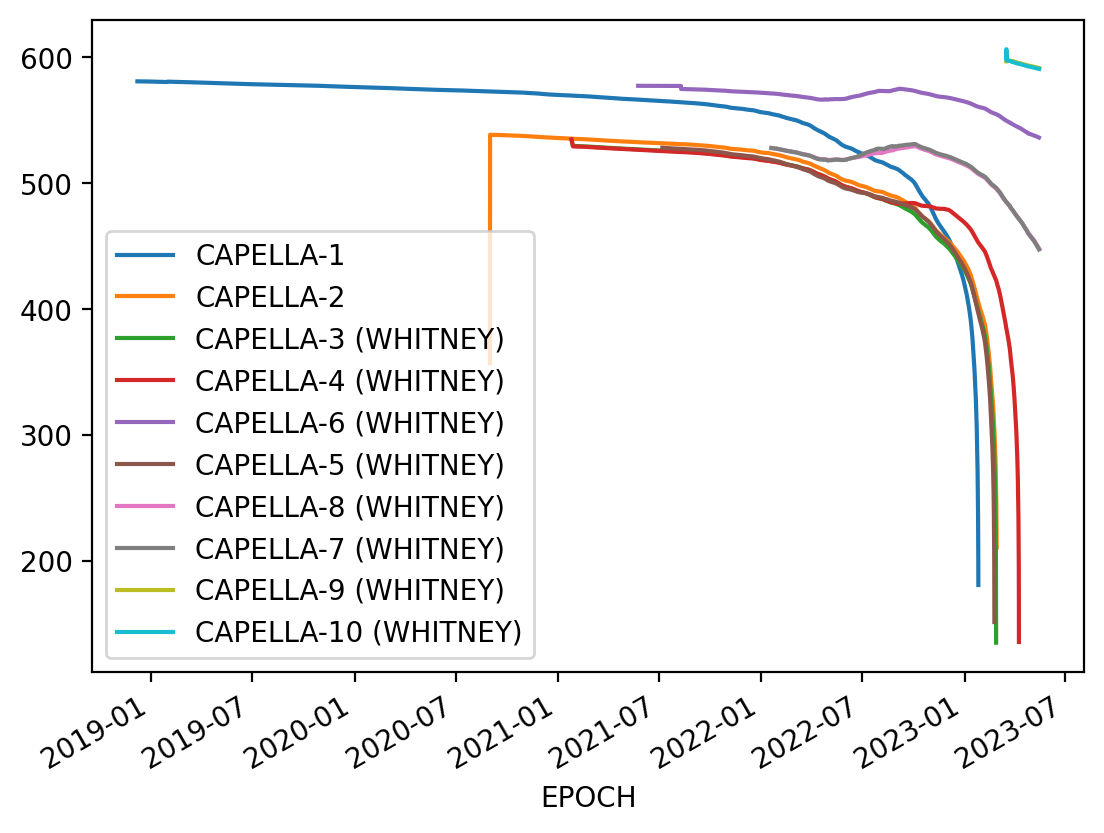

In [28]:
fig,ax = plt.subplots()
for satname,df in zip(dfC.SATNAME,dataframes):
    df.plot(x='EPOCH', y='SEMIMAJOR_AXIS', ax=ax, label=satname);

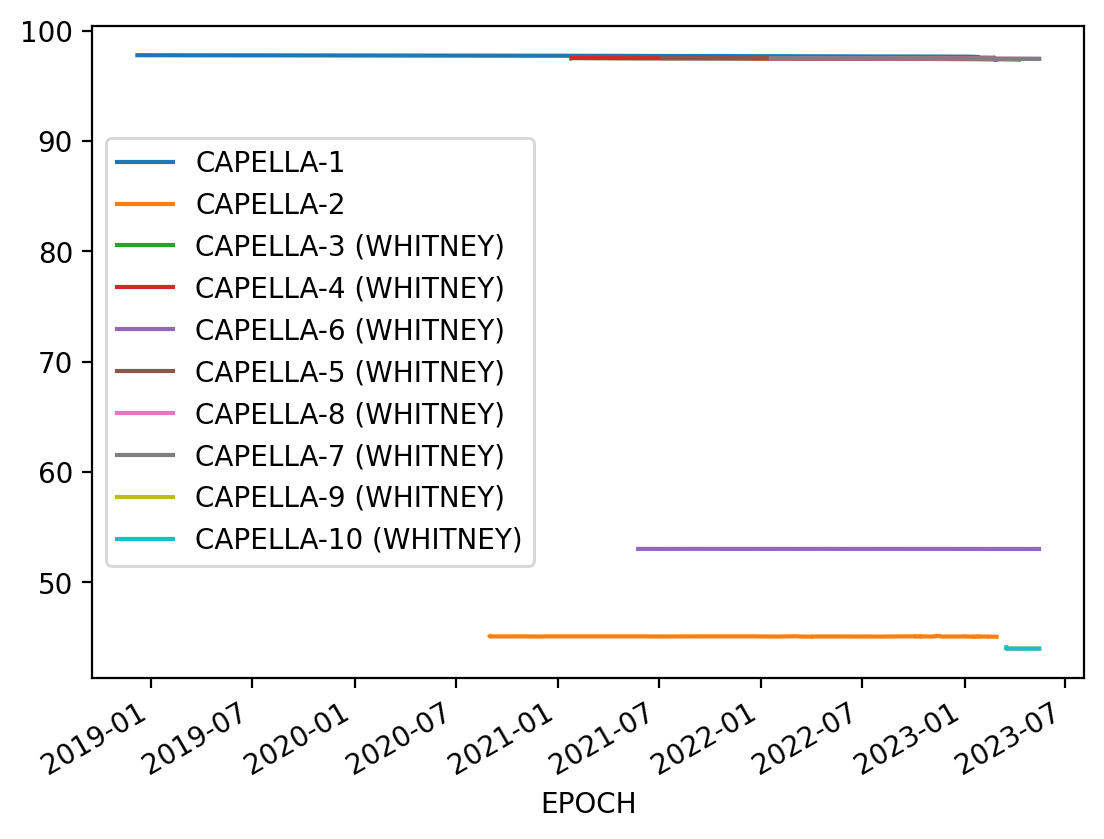

In [29]:
fig,ax = plt.subplots()
for satname,df in zip(dfC.SATNAME,dataframes):
    df.plot(x='EPOCH', y='INCLINATION', ax=ax, label=satname);

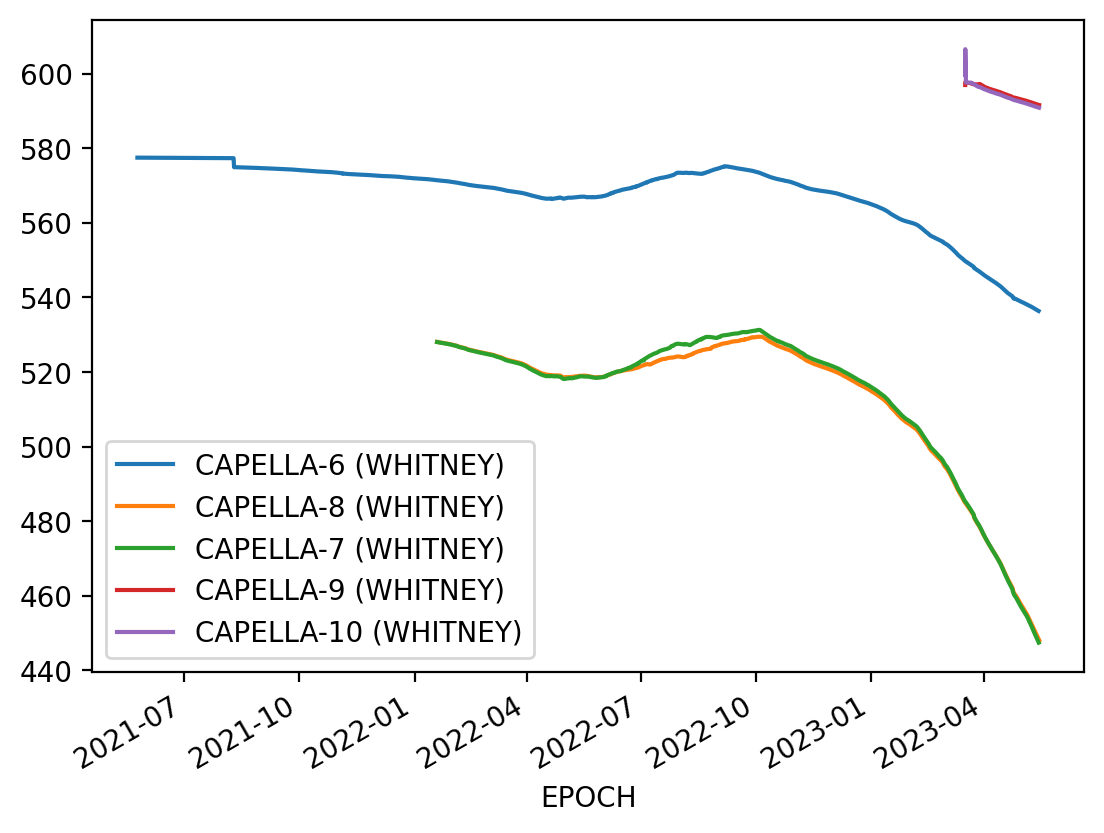

In [30]:
# Plot only active satellites
# NOTE: Capella-4 is about to be listed as 'DECAY',,,,
df = dfC[dfC.OPS_STATUS_CODE == '+']
df = df[~df.SATNAME.str.startswith('CAPELLA-4')]
dataframes = [get_orbital_history(x) for x in df.NORAD_CAT_ID]
fig,ax = plt.subplots()
for satname,df in zip(df.SATNAME,dataframes):
    df.plot(x='EPOCH', y='SEMIMAJOR_AXIS', ax=ax, label=satname);

In [31]:
df = dfC.loc[dfC.OPS_STATUS_CODE == '+',['SATNAME','INCLINATION', 'APOGEE']]# Two active polar orbits
df[~df.SATNAME.str.startswith('CAPELLA-4')].reset_index(drop=True)

,SATNAME,INCLINATION,APOGEE
0,CAPELLA-6 (WHITNEY),53.03,545
1,CAPELLA-8 (WHITNEY),97.44,452
2,CAPELLA-7 (WHITNEY),97.44,451
3,CAPELLA-9 (WHITNEY),44.00,596
4,CAPELLA-10 (WHITNEY),44.00,595


In [32]:
# NOTE: compute time to "DECAY" status for all CAPELLA satellites
pd.to_datetime(dfC.DECAY) - pd.to_datetime(dfC.LAUNCH)

0   1514 days
1    911 days
2    763 days
3    804 days
4         NaT
5    603 days
6         NaT
7         NaT
8         NaT
9         NaT
dtype: timedelta64[ns]